<a href="https://colab.research.google.com/github/kevingray92/ATMS-597-SP-2020/blob/patch-2/ATMS-597-SP-2020-Project-2/ATMS_597_Project_2_Miller_Plotting_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime

In [0]:
import requests

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.
    
    Parameters:
        - endpoint: The endpoint of the API you want to 
                    make a GET request to.
        - payload: A dictionary of data to pass along 
                   with the request.
    
    Returns:
        Response object.
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/'+endpoint,
        headers={
            'token': 'yicVcIaiwUAgtBveaBtWSaioiQvqRJRh'
        },
        params=payload
    )

In [3]:
# This cell will request locations. We used this to find the locationid for Champaign, IL area.
# !!!No need to run this cell again unless we want to look up a new locationid!!!

response = make_request(
    'locations', 
    {
        'datasetid' : 'GHCND', 
        'locationcategoryid' : 'CITY',
        'datacategoryid' : 'TEMP',
        'sortorder' : 'desc',
        'limit' : 1000 # max allowed
    }
)
response.json()

{'metadata': {'resultset': {'count': 1983, 'limit': 1000, 'offset': 1}},
 'results': [{'datacoverage': 0.9175,
   'id': 'CITY:ZI000004',
   'maxdate': '1990-02-28',
   'mindate': '1968-05-15',
   'name': 'Masvingo, ZI'},
  {'datacoverage': 0.8309,
   'id': 'CITY:ZI000003',
   'maxdate': '2020-02-07',
   'mindate': '1956-07-01',
   'name': 'Harare, ZI'},
  {'datacoverage': 0.9677,
   'id': 'CITY:ZI000002',
   'maxdate': '1989-06-30',
   'mindate': '1951-07-01',
   'name': 'Gweru, ZI'},
  {'datacoverage': 1,
   'id': 'CITY:ZI000001',
   'maxdate': '1990-02-28',
   'mindate': '1962-07-01',
   'name': 'Bulawayo, ZI'},
  {'datacoverage': 0.9746,
   'id': 'CITY:ZA000007',
   'maxdate': '1990-12-30',
   'mindate': '1950-01-01',
   'name': 'Ndola, ZA'},
  {'datacoverage': 1,
   'id': 'CITY:ZA000006',
   'maxdate': '2014-02-12',
   'mindate': '1956-01-01',
   'name': 'Mongu, ZA'},
  {'datacoverage': 0.9762,
   'id': 'CITY:ZA000005',
   'maxdate': '1990-12-30',
   'mindate': '1957-06-01',
   'na

In [10]:
# This cell will request stations. We used this to find the stationid for Rantoul, IL station.
# !!!No need to run this cell again unless we want to look up a new stationid!!!

response = make_request(
    'stations', 
    {
        'datasetid' : 'GHCND',
        'locationid' : 'CITY:US170004', 
        'datacategoryid' : 'TEMP',
        'limit' : 1000 # max allowed
    }
)
response.json()

{'metadata': {'resultset': {'count': 7, 'limit': 1000, 'offset': 1}},
 'results': [{'datacoverage': 0.9746,
   'elevation': 219.2,
   'elevationUnit': 'METERS',
   'id': 'GHCND:USC00113061',
   'latitude': 40.3175,
   'longitude': -88.3504,
   'maxdate': '2020-02-08',
   'mindate': '1997-11-01',
   'name': 'FISHER, IL US'},
  {'datacoverage': 0.3079,
   'elevation': 219.5,
   'elevationUnit': 'METERS',
   'id': 'GHCND:USC00116769',
   'latitude': 40.0063,
   'longitude': -88.1532,
   'maxdate': '2020-02-07',
   'mindate': '1893-01-01',
   'name': 'PHILO, IL US'},
  {'datacoverage': 0.9988,
   'elevation': 219.8,
   'elevationUnit': 'METERS',
   'id': 'GHCND:USC00118740',
   'latitude': 40.084,
   'longitude': -88.2404,
   'maxdate': '2020-02-08',
   'mindate': '1902-08-01',
   'name': 'CHAMPAIGN 3 S, IL US'},
  {'datacoverage': 0.582,
   'elevation': 217.9,
   'elevationUnit': 'METERS',
   'id': 'GHCND:USC00118750',
   'latitude': 40.11667,
   'longitude': -88.23333,
   'maxdate': '196

In [0]:
# Create lists containing the beginning and end of years we want to loop over.

yearstoget = np.arange(1949,2020)
currentlist = []
endlist = []
for i in yearstoget:
    currentlist.append(datetime.date(i, 1, 1))
    endlist.append(datetime.date(i, 12, 31))

In [0]:
# This cell will request the data

results = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numpy array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMAX',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    results.extend(response.json()['results']) # put the data in the results list

In [23]:
len(results) # check the length of the results list to make sure we have the correct number of days

25399

In [24]:
# Put the results in a pandas dataframe
df = pd.DataFrame(results)
df.tail()

,date,datatype,station,attributes,value
25394,2019-12-27T00:00:00,TMAX,GHCND:USW00014806,",,7,0700",6.1
25395,2019-12-28T00:00:00,TMAX,GHCND:USW00014806,",,7,0700",13.3
25396,2019-12-29T00:00:00,TMAX,GHCND:USW00014806,",,7,0700",15.0
25397,2019-12-30T00:00:00,TMAX,GHCND:USW00014806,",,7,0700",3.9
25398,2019-12-31T00:00:00,TMAX,GHCND:USW00014806,",,7,0700",0.6


In [0]:
###Rylan's code for getting Yearly Average Temperature goes here. ###

In [0]:
df.to_csv('Rantoul.csv')

In [27]:

df = pd.DataFrame(results)
 
df['date']= pd.to_datetime(df['date']) 
df.index = df['date']
 
del df['datatype']
del df['station']
del df['attributes']
#del df['date']
 
df.columns = ['date','TMAX']
df.to_csv('project2_data_TMAX')
 
df.head()

,date,TMAX
date,,
1949-01-01,1949-01-01,-0.6
1949-01-02,1949-01-02,2.8
1949-01-03,1949-01-03,4.4
1949-01-04,1949-01-04,10.0
1949-01-05,1949-01-05,4.4


In [42]:
#df = df.groupby(pd.Grouper(freq='Y')).mean()
#df.columns = ['Yearly Average Temperature']
#df.to_csv('project_2_Tavg')
#df
df = df.groupby(pd.Grouper(freq='Y')).mean()
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
df.columns = ['Yearly Average Temperature']
df['Anomalies'] = (df['Yearly Average Temperature'] - df['Yearly Average Temperature'].mean())
df

,Yearly Average Temperature,Anomalies
date,,
1949,17.221096,0.441129
1950,15.105479,-1.674487
1951,15.106575,-1.673391
1952,17.024044,0.244077
1953,17.877808,1.097842
...,...,...
2015,17.356986,0.577020
2016,18.389071,1.609105
2017,18.874247,2.094280


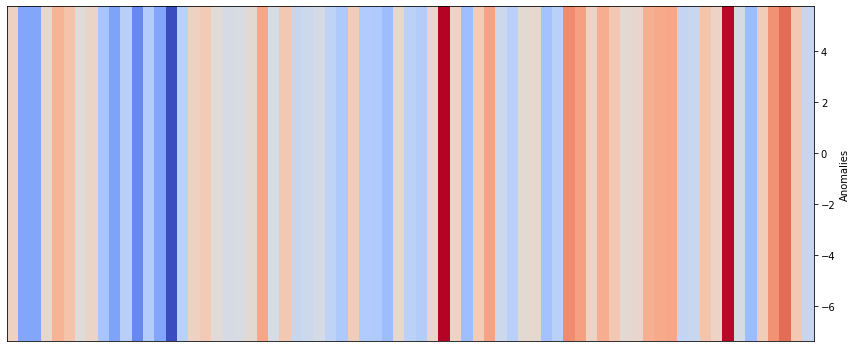

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
 
#plt.figure(figsize=(12, 5))
fig, ax = plt.subplots(figsize=(12,5))

sns.heatmap(data=df['Anomalies'][np.newaxis,:], cmap='coolwarm', cbar=False, vmin= -3, vmax= 3, center=0,
                 xticklabels=False, yticklabels=False, ax = ax)
 
ax2 = plt.twinx()
sns.lineplot(x=df.index, y=df["Anomalies"], color='Black', ax = ax2)

plt.tight_layout()
plt.show()

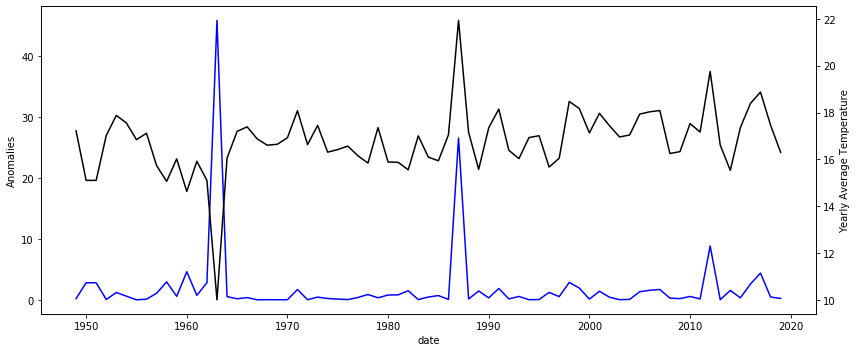

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set figure size with matplotlib
plt.figure(figsize=(12,5))

#sns.heatmap(data=df['Anomalies'][np.newaxis,:], cmap='coolwarm', cbar=False, vmin= -3, vmax= 3, center=0,
#                 xticklabels=False, yticklabels=False)
sns.lineplot(x=df.index, y=(df["Anomalies"])**2, color='Blue')

ax2 = plt.twinx()
sns.lineplot(x=df.index, y=df["Yearly Average Temperature"], color='Black', ax = ax2)

plt.tight_layout()
#plt.show()

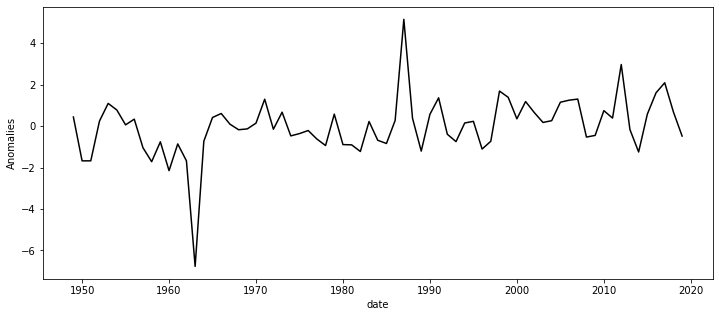

In [67]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(x=df.index, y=df['Anomalies'], color='Black', ax = ax)

plt.show()

<Figure size 864x360 with 0 Axes>

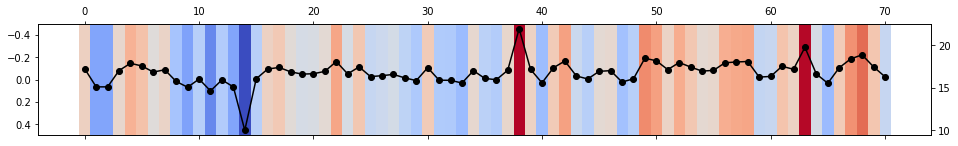

In [185]:
plt.figure(figsize=(12,5))

#df['Anomalies'].values
plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -3, vmax = 3)
#x_pos = np.arange(len(df['Anomalies']))
#plt.xticks(yearstoget)
ax = plt.twinx()
ax.plot(np.arange(0,71), df['Yearly Average Temperature'], color = 'black')
ax.plot(np.arange(0,71), df['Yearly Average Temperature'], 'ko')

plt.show()

In [197]:
max(df['Anomalies'].values)

5.153799829888257

<Figure size 864x360 with 0 Axes>

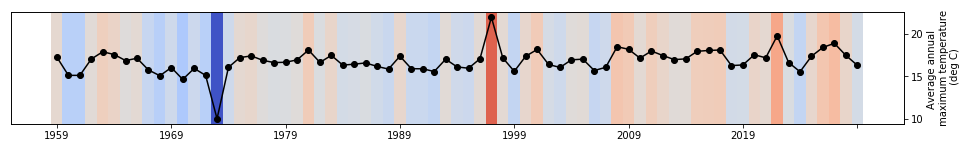

In [220]:
plt.figure(figsize=(12,5))

#df['Anomalies'].values
ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -7, vmax = 7)
ax.axes.get_yaxis().set_visible(False)
ax.axes.set_xticklabels(yearstoget[0::10])
ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
#ax.axes.set_xlim(left = 0, right = len(yearstoget)-1)

#x_pos = np.arange(len(df['Anomalies']))
#plt.xticks(yearstoget)
ax2 = plt.twinx()
ax2.plot(np.arange(0,71), df['Yearly Average Temperature'], color = 'black')
ax2.plot(np.arange(0,71), df['Yearly Average Temperature'], 'ko')
ax2.axes.set_ylabel('Average annual \n maximum temperature \n (deg C)')

plt.show()

<Figure size 864x360 with 0 Axes>

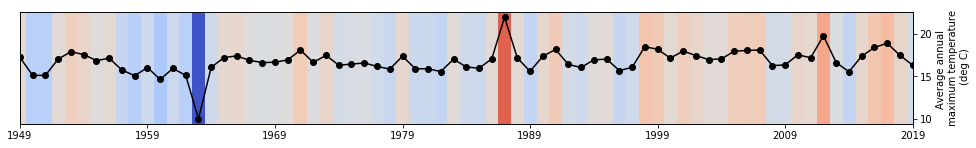

In [249]:


plt.figure(figsize=(12,5))

#df['Anomalies'].values
ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -7, vmax = 7)
ax.axes.get_yaxis().set_visible(False)
ax.axes.set_xticklabels(yearstoget[0::10])
ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
ax.axes.set_xlim(left = 0, right = len(yearstoget)-1)

#x_pos = np.arange(len(df['Anomalies']))
#plt.xticks(yearstoget)
ax2 = plt.twinx()
ax2.plot(np.arange(0,len(yearstoget)), df['Yearly Average Temperature'], color = 'black')
ax2.plot(np.arange(0,len(yearstoget)), df['Yearly Average Temperature'], 'ko')
ax2.axes.set_ylabel('Average annual \n maximum temperature \n (deg C)')

plt.show()